In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("netflix_titles.csv")

print(df.head())
print(df.info())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0  25-Sep-21          2020  PG-13     90 min   
1  24-Sep-21          2021  TV-MA  2 Seasons   
2  24-Sep-21          2021  TV-MA   1 Season   
3  24-Se

In [3]:
df["country"].fillna("Unknown", inplace=True)
df["rating"].fillna("Unknown", inplace=True)
df["duration"].dropna(inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_20384\212707648.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["country"].fillna("Unknown", inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_20384\212707648.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an i

In [4]:
def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split(" ")[0]) * 60
    else:
        return np.nan

df["duration_num"] = df["duration"].apply(convert_duration)
df.dropna(subset=["duration_num"], inplace=True)


In [5]:
le = LabelEncoder()

df["type_enc"] = le.fit_transform(df["type"])
df["rating_enc"] = le.fit_transform(df["rating"])
df["country_enc"] = le.fit_transform(df["country"])


In [6]:
X = df[[
    "release_year",
    "type_enc",
    "rating_enc",
    "country_enc"
]]

y = df["duration_num"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1, max_iter=5000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)


In [9]:
results = {
    "Linear Regression": r2_score(y_test, y_pred_lr),
    "Ridge": r2_score(y_test, y_pred_ridge),
    "Lasso": r2_score(y_test, y_pred_lasso),
    "ElasticNet": r2_score(y_test, y_pred_elastic)
}

res_df = pd.DataFrame(
    results.items(), columns=["Model", "R2_Score"]
).sort_values("R2_Score", ascending=False)

print("\n--- NETFLIX DURATION PREDICTION (LINEAR REGRESSION) ---")
print(res_df)



--- NETFLIX DURATION PREDICTION (LINEAR REGRESSION) ---
               Model  R2_Score
3         ElasticNet  0.009426
2              Lasso  0.008322
1              Ridge  0.007801
0  Linear Regression  0.007796


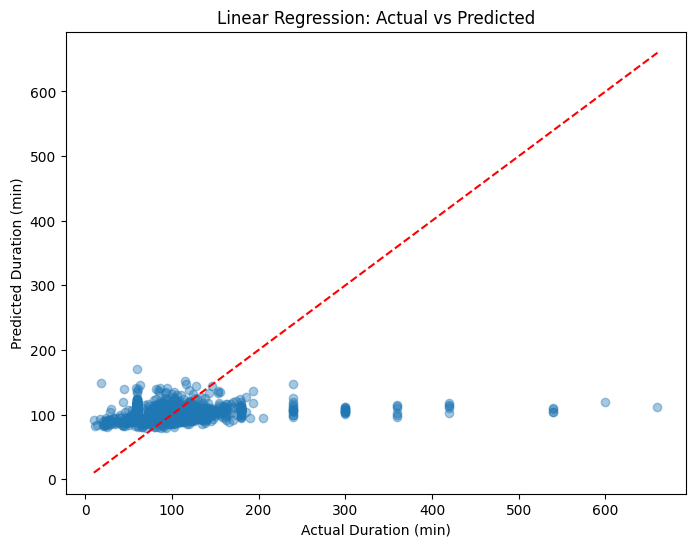

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("Actual Duration (min)")
plt.ylabel("Predicted Duration (min)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [11]:
import joblib


In [12]:
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
le_rating = LabelEncoder()
le_country = LabelEncoder()

df["type_enc"] = le_type.fit_transform(df["type"])
df["rating_enc"] = le_rating.fit_transform(df["rating"])
df["country_enc"] = le_country.fit_transform(df["country"])


In [ ]:
joblib.dump(model, "model.pkl")
